## Problem 3

In [1]:
# import denpendencies
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

import rbfnn

### Training Data Generation

441 73 368


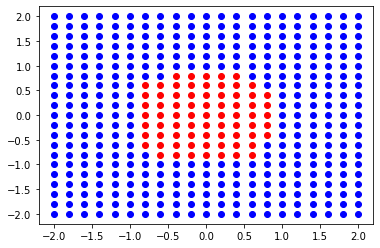

In [2]:
# generate training data
train_data = []
for i in range(21):
    for j in range(21):
        xi, xj = -2+0.2*i, -2+0.2*j
        train_data.append([xi, xj, 1 if xi**2 + xj**2 < 1 else -1])
print(len(train_data), [item[2] for item in train_data].count(1), [item[2] for item in train_data].count(-1))
# plot training data (red for +1, blue for -1)
plt.scatter([item[0] for item in train_data if item[2] == 1], [item[1] for item in train_data if item[2] == 1], color = 'red')
plt.scatter([item[0] for item in train_data if item[2] == -1], [item[1] for item in train_data if item[2] == -1], color = 'blue')
plt.show()

In [3]:
# train-test split (ratio = 0.2)
X = [[item[0], item[1]] for item in train_data]
Y = [item[2] for item in train_data]
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
len(X_train), len(X_val), len(y_train), len(y_val)

(352, 89, 352, 89)

### Experiment 1

- Use every point as center (441 centers),
- Use same spread parameter (width) for each center;
- Vary spread parameter from 0.05 to 4

In [4]:
mse_result = []
for wid in np.arange(0.01, 4.0, 0.01):
    rbf_param = [[(item[0], item[1]), wid] for item in train_data]
    net = rbfnn.Rbfnn(rbf_param=rbf_param)
    G = net.compute_G(X_train)
    net.compute_W(G, y_train)
    mse = mean_squared_error(y_val, net.predict(X_val))
    mse_result.append(mse)

Plot mean square error v.s. spread parameter

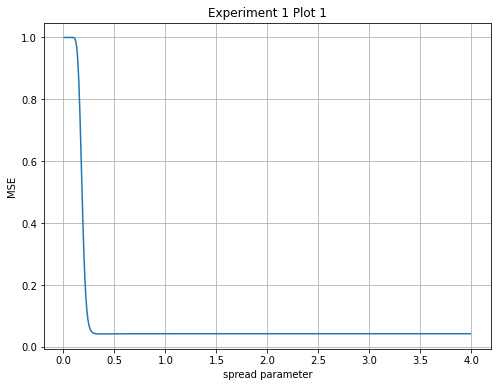

In [8]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0.01, 4.0, 0.01), mse_result)
plt.xlabel('spread parameter')
plt.ylabel('MSE')
plt.title("Experiment 1 Plot 1")
plt.grid()
plt.show()

In [ ]:
max(mse_result), min(mse_result)

### Experiment 2

- Randomly select 150 points as center,
- Use same spread paramter for all centers,
- Vary spread parameter from 0.05 to 4

In [9]:
random.seed(2022)
centers = random.choices(train_data, k = 150)
mse_result2 = []
for wid in np.arange(0.01, 4, 0.01): 
    rbf_param = [[(item[0], item[1]), wid] for item in centers]
    net = rbfnn.Rbfnn(rbf_param=rbf_param)
    G = net.compute_G(X_train)
    net.compute_W(G, y_train)
    mse = mean_squared_error(y_val, net.predict(X_val))
    mse_result2.append(mse)

Plot mean square error v.s. spread parameter

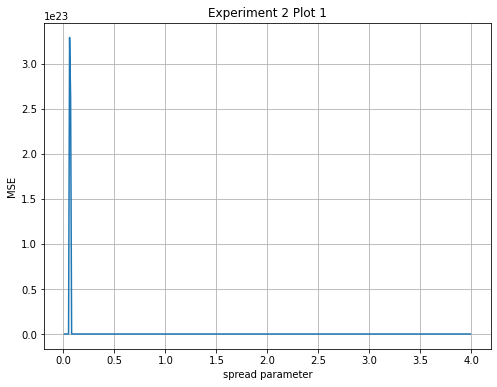

In [11]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0.01, 4.0, 0.01), mse_result2)
plt.xlabel('spread parameter')
plt.ylabel('MSE')
plt.title("Experiment 2 Plot 1")
plt.grid()
plt.show()

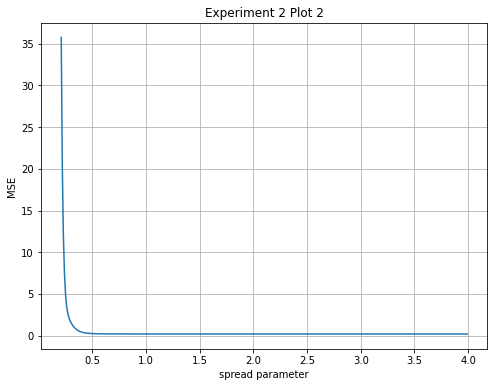

In [13]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0.01, 4.0, 0.01)[20:], mse_result2[20:])
plt.xlabel('spread parameter')
plt.ylabel('MSE')
plt.title("Experiment 2 Plot 2")
plt.grid()
plt.show()

In [12]:
max(mse_result2), min(mse_result2)

(3.2920663170053756e+23, 0.19581194741832111)

### Experiment 3

- Select 150 points using K-means algorithm,
- Use same spread paramter for all centers,
- Vary spread parameter from 0.05 to 4

In [18]:
kmeans = KMeans(n_clusters=150, random_state=0).fit(X)
centers = kmeans.cluster_centers_
mse_result3 = []
for wid in np.arange(0.01, 4.0, 0.01): 
    rbf_param = [[(item[0], item[1]), wid] for item in centers]
    net = rbfnn.Rbfnn(rbf_param=rbf_param)
    G = net.compute_G(X_train)
    net.compute_W(G, y_train)
    mse = mean_squared_error(y_val, net.predict(X_val))
    mse_result3.append(mse)

Plot mean square error v.s. spread parameter

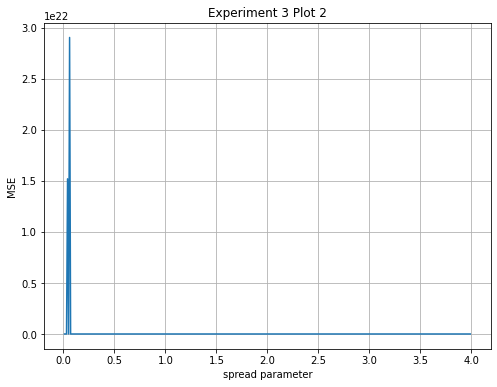

In [19]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0.01, 4.0, 0.01), mse_result3)
plt.xlabel('spread parameter')
plt.ylabel('MSE')
plt.title("Experiment 3 Plot 2")
plt.grid()
plt.show()

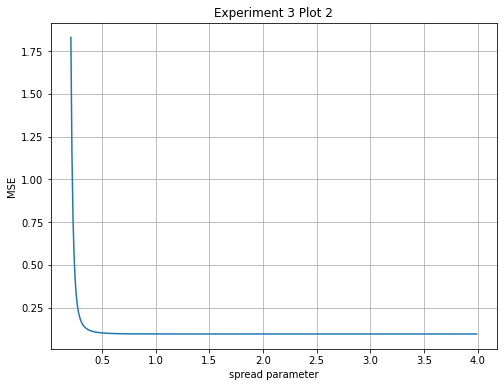

In [20]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0.01, 4.0, 0.01)[20:], mse_result3[20:])
plt.xlabel('spread parameter')
plt.ylabel('MSE')
plt.title("Experiment 3 Plot 2")
plt.grid()
plt.show()

In [21]:
max(mse_result3), min(mse_result3)

(2.905071423060683e+22, 0.09640672125929428)

In [26]:
kmeans = KMeans(n_clusters=150, random_state=0).fit(X)
centers = kmeans.cluster_centers_
mse_result4 = []
for wid in np.arange(0.5, 100, 0.5): 
    rbf_param = [[(item[0], item[1]), wid] for item in centers]
    net = rbfnn.Rbfnn(rbf_param=rbf_param)
    G = net.compute_G(X_train)
    net.compute_W(G, y_train)
    mse = mean_squared_error(y_val, net.predict(X_val))
    mse_result4.append(mse)

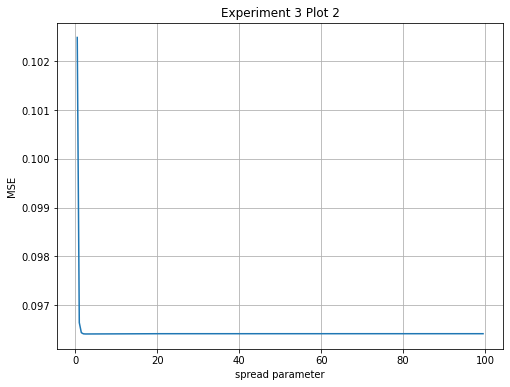

In [27]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0.5, 100, 0.5), mse_result4)
plt.xlabel('spread parameter')
plt.ylabel('MSE')
plt.title("Experiment 3 Plot 2")
plt.grid()
plt.show()